In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
with open("training.pt", "rb") as file:
    analysis = pickle.load(file)
for k in analysis.keys(): print(k)
print("\nlength", len(analysis["loss"]))

loss
accuracy

length 17983


In [3]:
N = 32

loss_mean = np.array([np.mean(chunk) for chunk in np.array_split(analysis["loss"], N)])
loss_std = np.array([np.std(chunk) for chunk in np.array_split(analysis["loss"], N)])
acc_mean = np.array([np.mean(chunk) for chunk in np.array_split(analysis["accuracy"], N)])
acc_std = np.array([np.std(chunk) for chunk in np.array_split(analysis["accuracy"], N)])

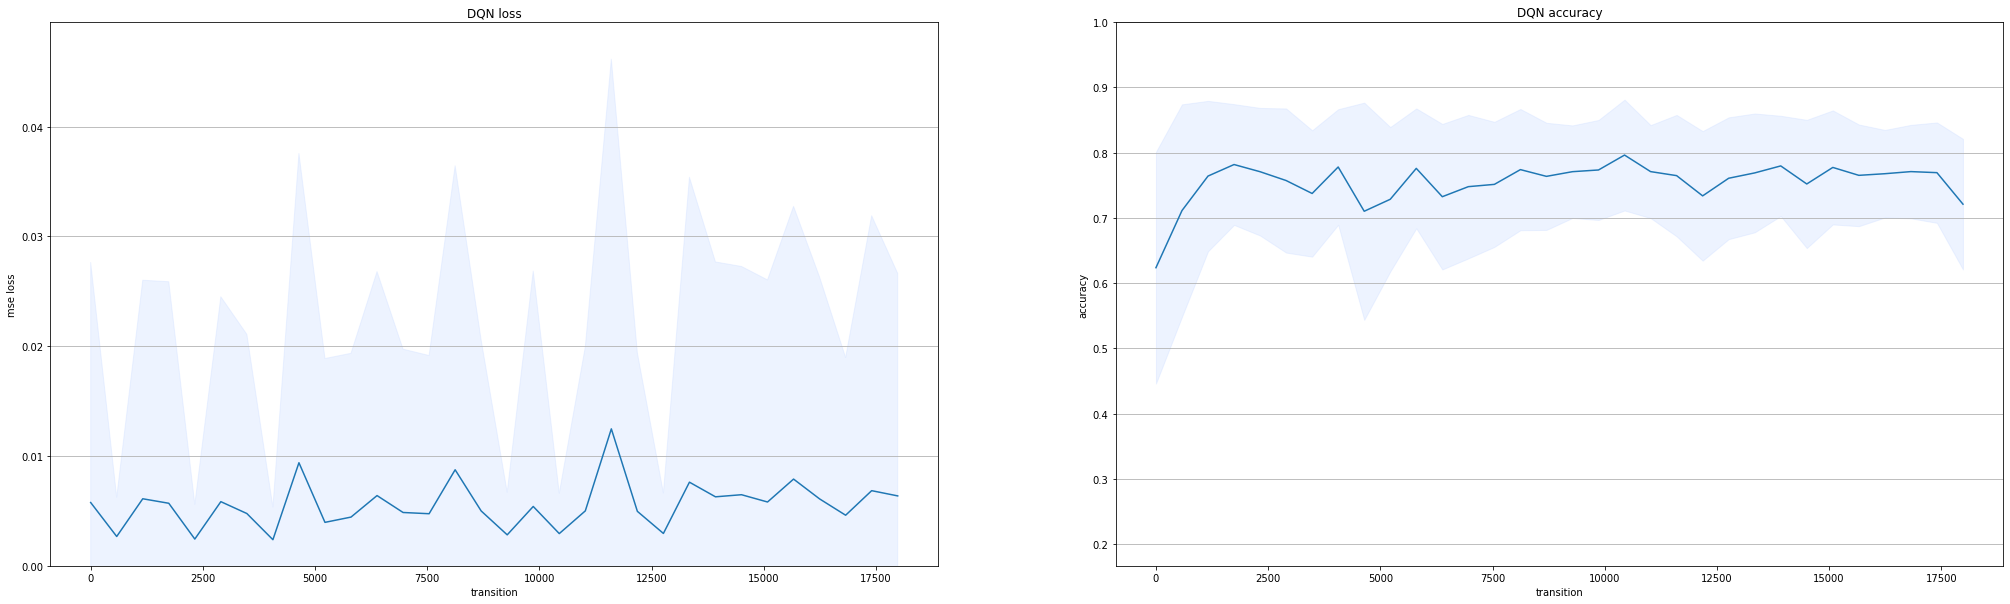

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(35, 10))

ax[0].plot(np.linspace(0, len(analysis["loss"]), N), loss_mean, label="mean loss")
ax[0].fill_between(np.linspace(0, len(analysis["loss"]), N), loss_mean - loss_std, loss_mean + loss_std, label="std loss", color="#bbd2ff", alpha=0.25)
ax[1].plot(np.linspace(0, len(analysis["accuracy"]), N), acc_mean, label="mean acc")
ax[1].fill_between(np.linspace(0, len(analysis["accuracy"]), N), acc_mean - acc_std, acc_mean + acc_std, label="std acc", color="#bbd2ff", alpha=0.25)

ax[0].set_xlabel("transition")
ax[1].set_xlabel("transition")

ax[0].set_ylabel("mse loss")
ax[1].set_ylabel("accuracy")

ax[0].set_title("DQN loss")
ax[1].set_title("DQN accuracy")

ax[0].grid(axis="y")
ax[1].grid(axis="y")

ax[0].set_ylim(0.0, None);
ax[1].set_ylim(1/6, 1);

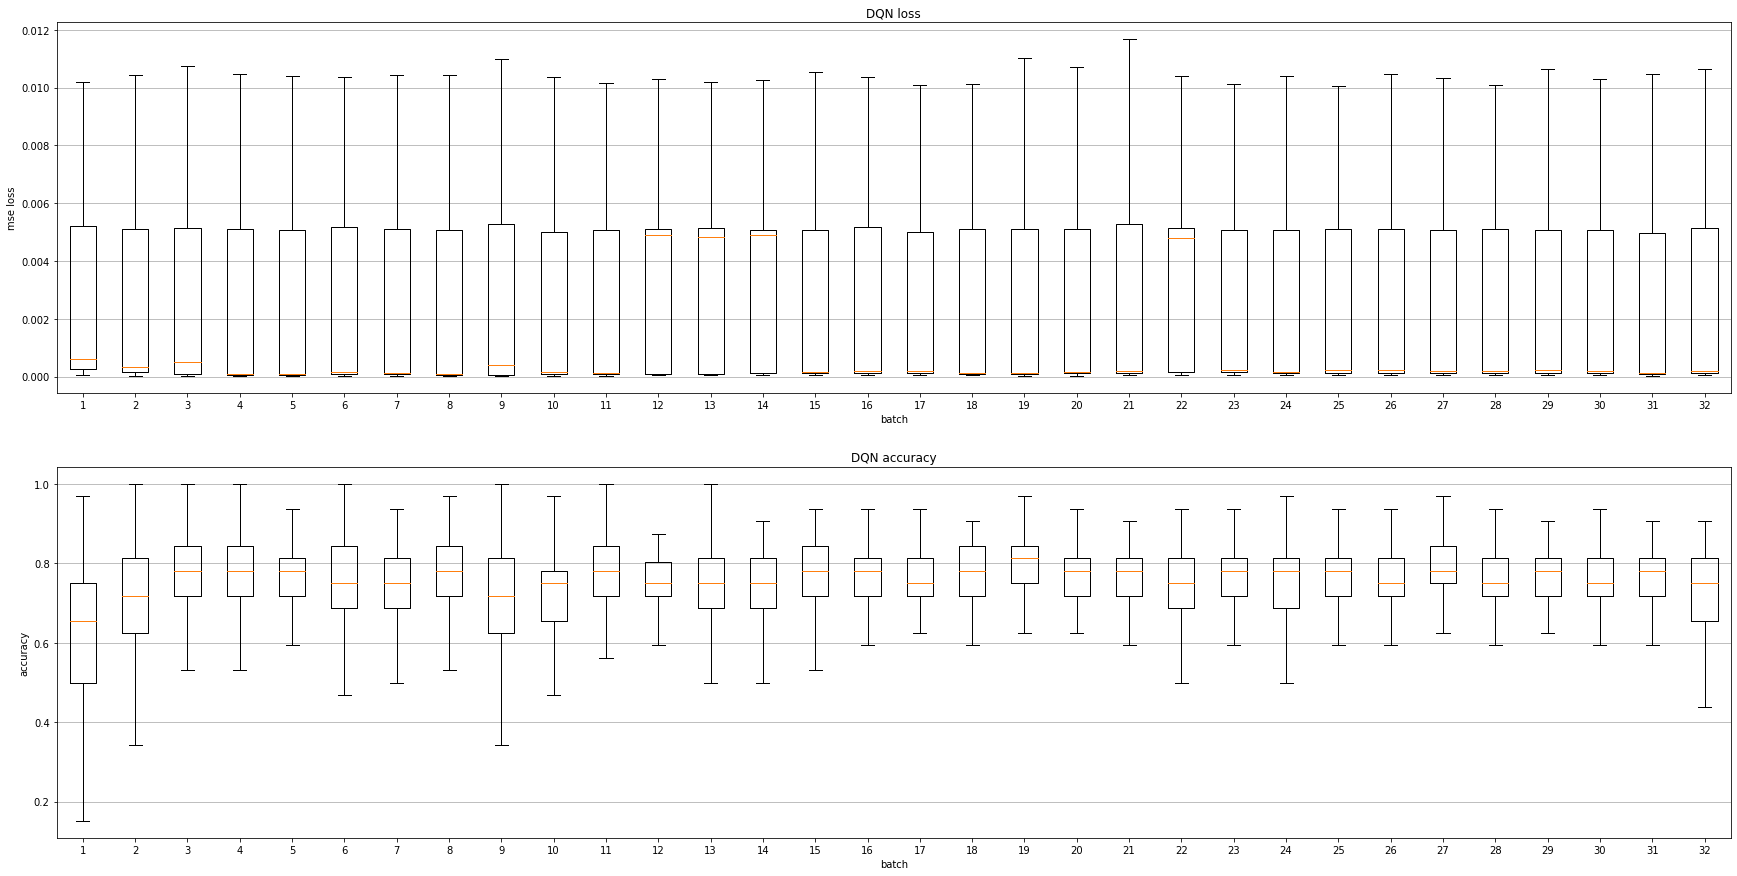

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(30, 15))

ax[0].set_xlabel("batch")
ax[1].set_xlabel("batch")

ax[0].set_ylabel("mse loss")
ax[1].set_ylabel("accuracy")

ax[0].set_title("DQN loss")
ax[1].set_title("DQN accuracy")

ax[0].grid(axis="y")
ax[1].grid(axis="y")

ax[0].boxplot(np.array_split(analysis["loss"], N), showfliers=False);
ax[1].boxplot(np.array_split(analysis["accuracy"], N), showfliers=False);

In [6]:
dqn_weights = tf.keras.models.load_model("DQN").get_weights()
im_weights = tf.keras.models.load_model("../1_imitation/512-512-512_256-128/imitator").get_weights()

OSError: SavedModel file does not exist at: ../1_imitation/512-512-512_256-128/imitator/{saved_model.pbtxt|saved_model.pb}

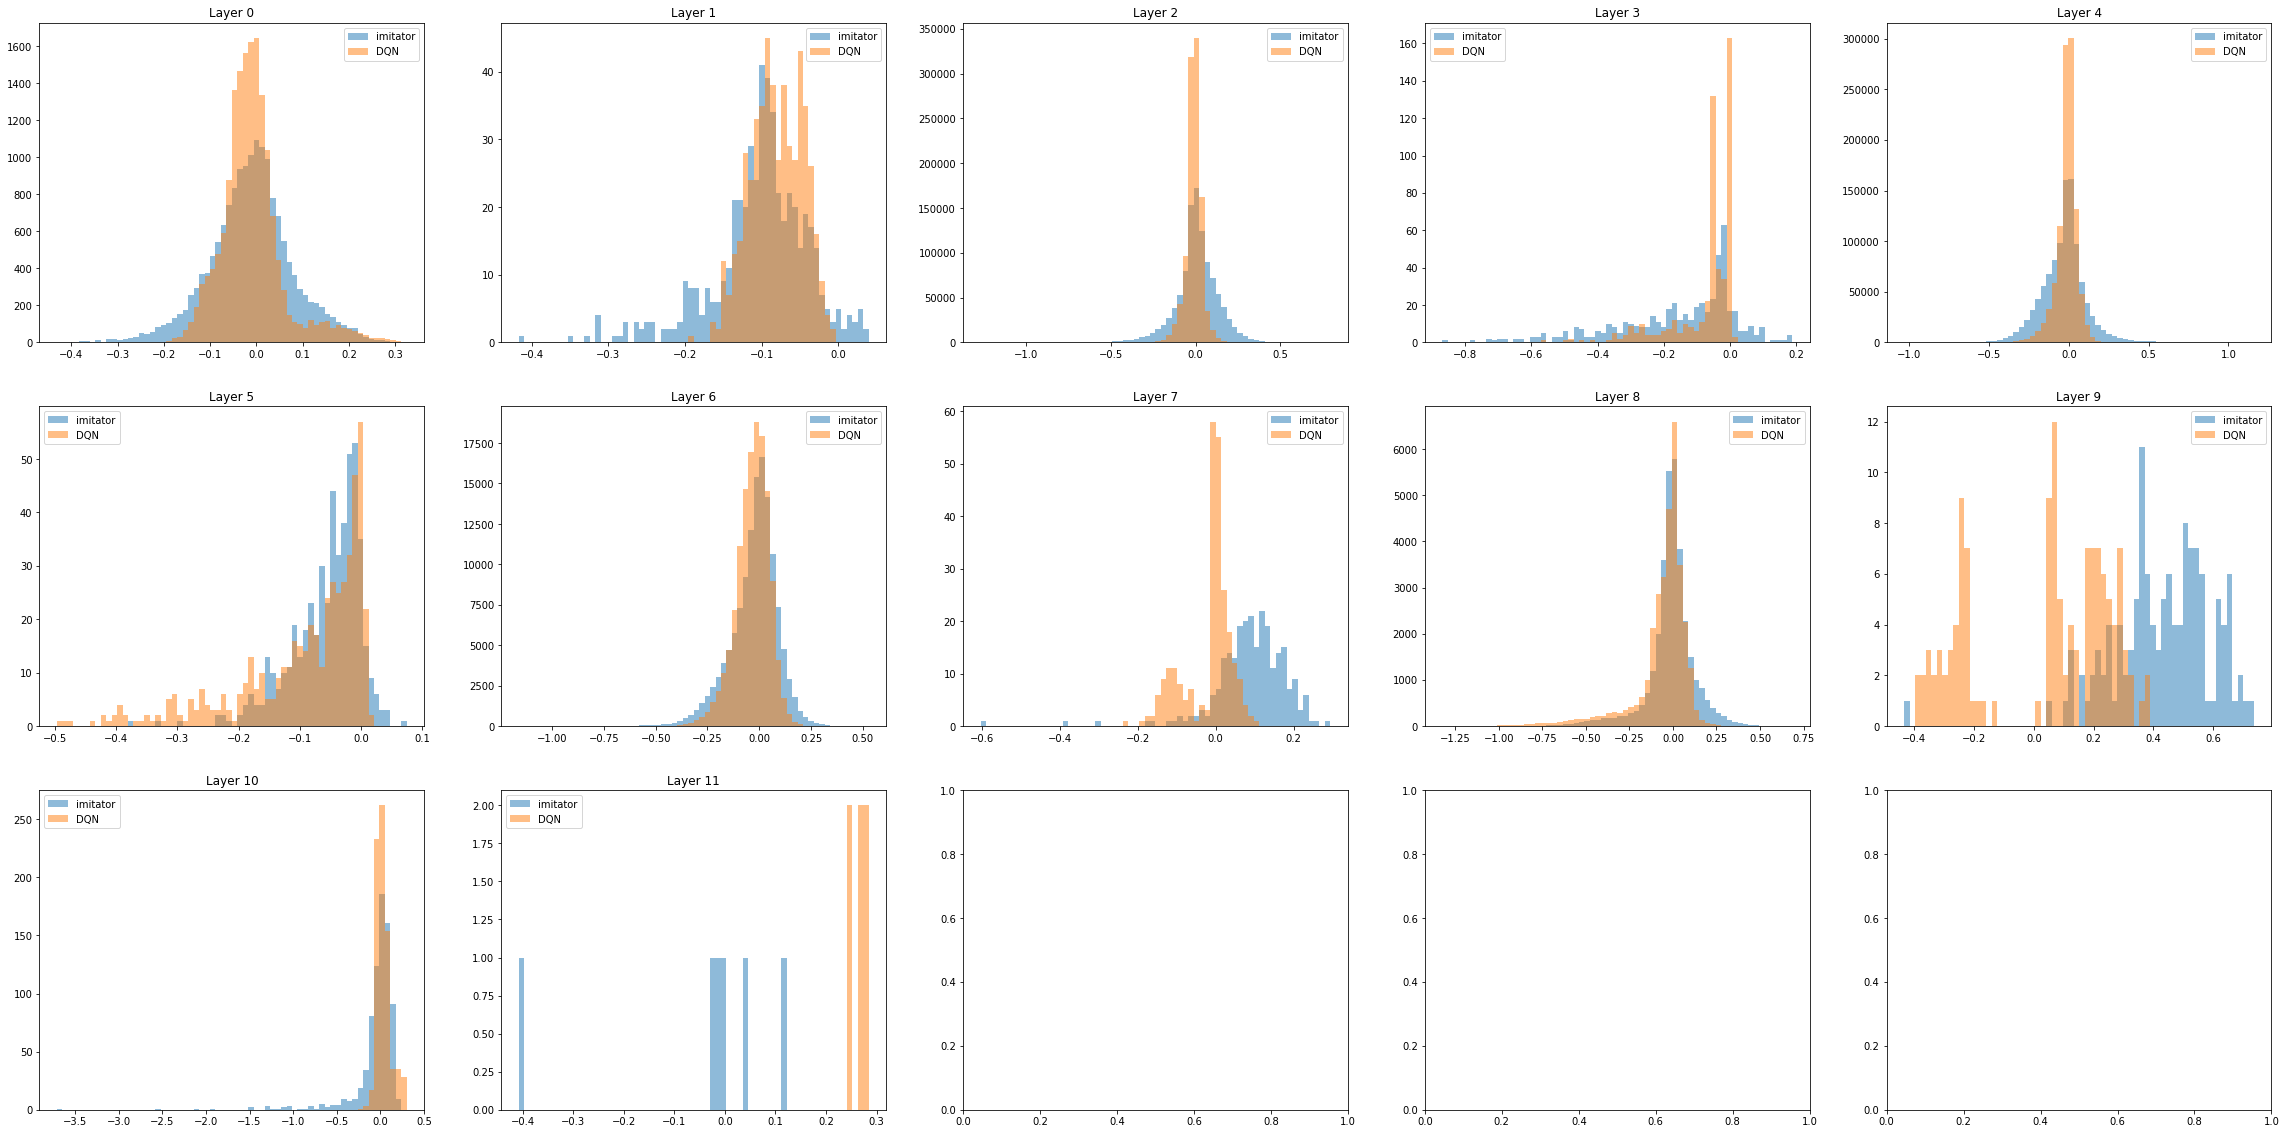

In [7]:
N = len(dqn_weights)
COLS = 5
ROWS = int(np.ceil(N/COLS))
fig, ax = plt.subplots(ROWS, COLS, figsize=(40, 20))

for i in range(ROWS):
    for j in range(COLS):
        if i * COLS + j < N:
            bins = np.histogram(np.hstack((dqn_weights[i * COLS + j], im_weights[i * COLS + j])), bins=64)[1]
            ax[i][j].hist(im_weights[i * COLS + j].ravel(), bins=bins, alpha=0.5, label="imitator")
            ax[i][j].hist(dqn_weights[i * COLS + j].ravel(), bins=bins, alpha=0.5, label="DQN")
            ax[i][j].set_title(f"Layer {i * COLS + j}")
            ax[i][j].legend()